<a href="https://colab.research.google.com/github/kiranahire03/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_(Kiran_Ahire).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 3**

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments

## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## **Loading Dataset and importing Modules**

In [1]:
#importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing dataset
credit_df = pd.read_csv('/content/drive/MyDrive/Credit Card Default Prediction/default of credit card clients.csv')

## **Understanding the data**

In [3]:
#Getting first five rows
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Getting last five rows
credit_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
#Getting number of rows and columns
credit_df.shape

(30000, 25)

In [6]:
#check details about the data set
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
#Gettting columns in dataset
print('Features of the Dataset : ')
credit_df.columns

Features of the Dataset : 


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#finding unique values
credit_df.nunique()


ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [9]:
#Looking for the description of the dataset to get insights of the data
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


*   **In our dataset we have 30,000 rows and 25 columns.**
*   **Default payment next month is our target variable.**



## **Features description**

### **Breakdown of Our Features:**

**ID** : Id of each client

**LIMIT_BAL** : Amount of the given credit in NT dollar

**SEX** : Gender (1 = male, 2 = female)

**EDUCATION** : (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

**MARRIAGE** : Marital status (0 = others, 1 = married, 2 = single, 3 = others)

**AGE** : Age is in years

**PAY_0** : Repayment status in September, 2005

**PAY_2** : Repayment status in August, 2005

**PAY_3** : Repayment status in July, 2005

**PAY_4** : Repayment status in June, 2005

**PAY_5** : Repayment status in May, 2005

**PAY_6** : Repayment status in April, 2005

**BILL_AMT1** : Amount of bill statement in September, 2005

**BILL_AMT2** : Amount of bill statement in August, 2005

**BILL_AMT3** : Amount of bill statement in July, 2005

**BILL_AMT4** : Amount of bill statement in June, 2005

**BILL_AMT5** : Amount of bill statement in May, 2005

**BILL_AMT6** : Amount of bill statement in April, 2005

**PAY_AMT1** : Amount of previous payment in September, 2005

**PAY_AMT2** : Amount of previous payment in August, 2005

**PAY_AMT3** : Amount of previous payment in July, 2005

**PAY_AMT4** : Amount of previous payment in June, 2005

**PAY_AMT5** : Amount of previous payment in May, 2005

**PAY_AMT6** : Amount of previous payment in April, 2005

**default.payment.next.month** : Default payment (1=yes, 0=no)



## **Note** :-

**Scale for PAY_0 to PAY_6** : 

***(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above***)

***In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.***

# **Preprocessing the dataset**

### **Missing values**

In [10]:
#Checking for the missing values
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

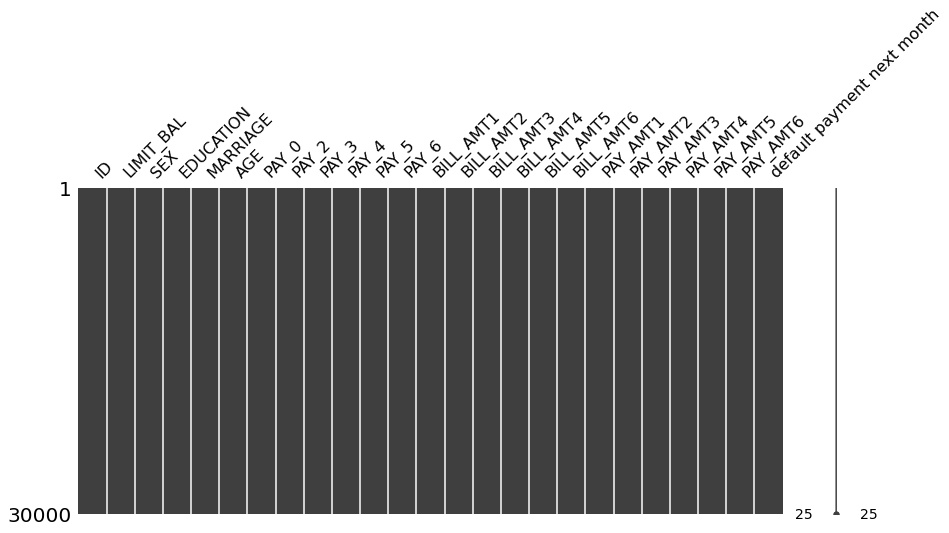

In [11]:
#Checking for any missing values 
msno.matrix(credit_df,figsize = (14,6),labels = None)


*   **From the above plot we can say that there are no missing values in our dataset.**

### **Duplicate values**

In [12]:
# Checking Duplicate Values
duplicate = len(credit_df[credit_df.duplicated()])
print("Duplicate values in the data set is = ",duplicate)

Duplicate values in the data set is =  0




*  **From the above we can see as there are no Duplicate values as well.**



### **Renaming Columns**

In [13]:
#Renaming Columns

credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR','Default payment next month' : 'default_payment_next_month'},inplace=True)

In [14]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEPT                    30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JUL                     30000 non-null  int64
 9   PAY_JUN                     30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_AMT_SEPT               30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

In [15]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Exploratory Data Analysis**

## **Univariate Analysis**

### **Dependent Variable:**
 
*   A dependent variable is a variable whose value will change depending on the value of another variable. In out dataset, Our dependent variable is "**default_payment_next_month**" so we need to analysis this column with the other columns by using some visualisation plot.
*   In this if **Y=0 then not default, Y=1 then default**". This information could be used to test the accuracy of the model that will be built.



In [16]:
credit_df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

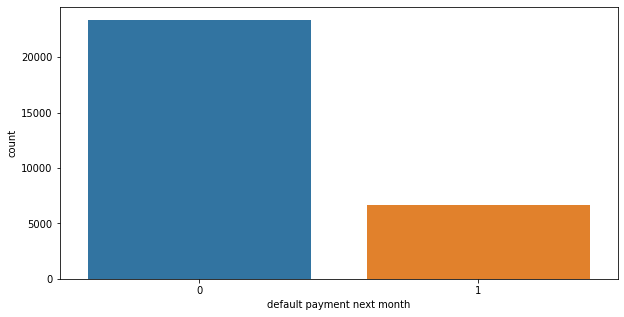

In [17]:
#plot the count plot to check the data distribution
plt.figure(figsize = (10,5))
sns.countplot(x = 'default payment next month',data = credit_df)

**From the above data analysis we can say that**
*   **0 - Not Default**
*   **1 - Default**
*   **Numbers of Defaulters are less than the Non Defaulters in the given dataset.**

## **Analysis of Independent Variable:** 

### **Categorical  Features**

***following are categorical features in our dataset***
*   sex
*   education
*   marraige 
*   age

### ***SEX***


*   **1 - Male**
*   **2 - Female**



In [18]:
# counts the SEX variable data set
credit_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

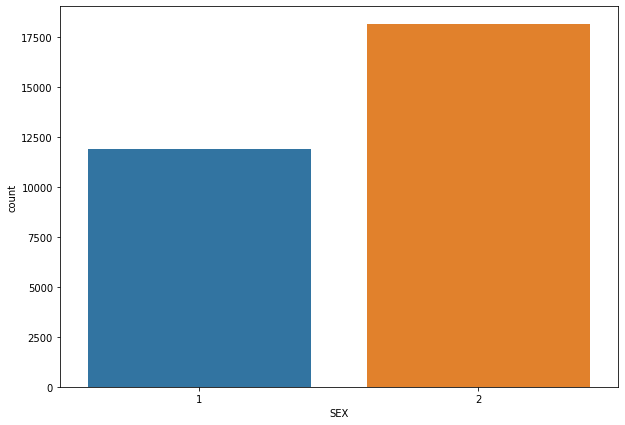

In [19]:
plt.figure(figsize = (10,7))
sns.countplot(x=  'SEX',data = credit_df)

**From the above data analysis we can say that**
*   **1 - Male**
*   **2 - Female**
*   ***Number of Male credit holder is less than Female.***

### **Education**



 **1 = graduate school; 2 = university; 3 = high school; 0 = others**

In [20]:
# counts the education  data set variable data set
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**Since in 'EDUCATION' column 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. So let's combine 0,4,5,6 to 0 which means"other'.**

In [21]:
#replace 4,5,6 to 0
credit_df['EDUCATION'] = credit_df['EDUCATION'].replace({4:0,5:0,6:0})
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

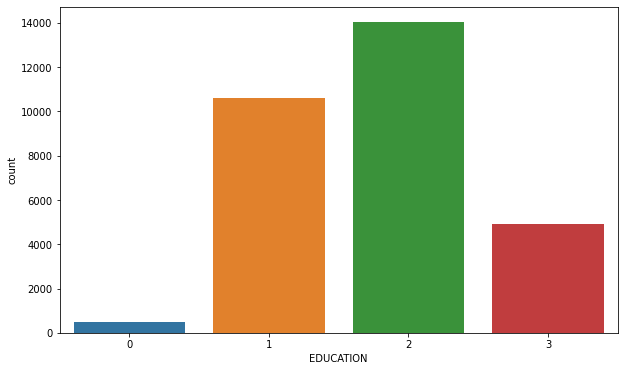

In [22]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize = (10,6))
sns.countplot(x = 'EDUCATION', data = credit_df)

**From the above data analysis we can say that**
*   ***More number of credit holders are university students followed by Graduates and then High school students.***

### **Marriage**


**1 = married; 2 = single; 3 = others**

In [25]:
credit_df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In the dataset we have given only values for **MARRIAGE** : **1 = married; 2 = single; 3 = others** but we have one more value here i.e 0

In [23]:
credit_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

**Since the count for 0 is very small , lets combine count of 0 to 3.**

In [26]:
# Combine 0 and 3 by changing the value 0 into others

credit_df["MARRIAGE"] = credit_df["MARRIAGE"].replace({0:3})
credit_df["MARRIAGE"].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

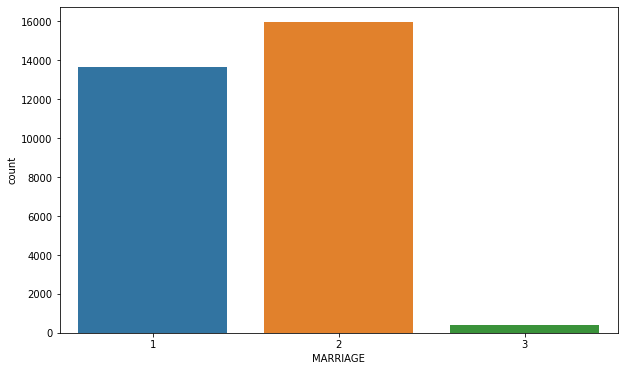

In [27]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'MARRIAGE' , data = credit_df)

**From the above data analysis we can say that**
*   **1 - married**
*   **2 - single**
*   **3 - others**
*   ***More number of credit cards holder are Single.***

### **AGE**

**Plotting graph of number of ages of all people with credit card irrespective of gender.**

In [28]:
credit_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

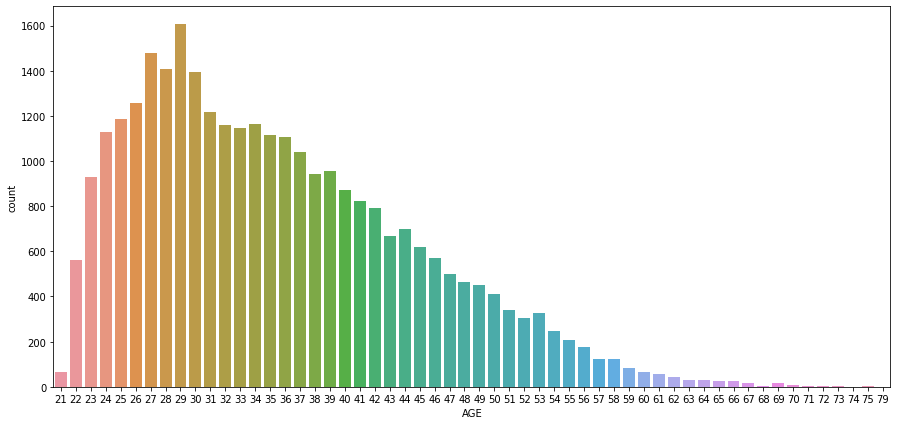

In [29]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = credit_df)
plt.show()

**From the above data analysis we can say that**
*  ***We can see more number of credit cards holder age are between 26-30 years old.***
*  ***Age above 60 years old rarely uses the credit card.***